# Model Evaluation

In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import cv2 as cv
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## LOAD VALIDATION (TEST) DATA

In [2]:
# Load picked data
df_test = pd.read_pickle("../pickled_data/df_val.pkl")
df_test

,image_data,label
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
...,...,...
395,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
396,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
397,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
398,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0


In [3]:
# Flatten the image_data
df_test['image_data'] = df_test['image_data'].apply(lambda x: x.flatten())
df_test

,image_data,label
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
...,...,...
395,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
396,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
397,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
398,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0


## LOAD MODELS

In [4]:
# Load SVM model variant (a)
svm_model_a = joblib.load("../exported_models/svm_model_(a).pkl")
svm_model_a

SVC(C=1, kernel='linear')

In [5]:
# Load SVM model variant (b)
svm_model_b = joblib.load("../exported_models/svm_model_(b).pkl")
svm_model_b

SVC(C=1)

In [6]:
# Load SVM model variant (c)
svm_model_c = joblib.load("../exported_models/svm_model_(c).pkl")
svm_model_c

SVC(C=1, kernel='poly')

## Evaluation of the models' performance on the validation data

In [7]:
# Import time module to measure the time taken to predict
import time

In [8]:
# Predict the test data (using the SVM model variant (a))
start_time = time.time()
y_predicted_a = svm_model_a.predict(df_test['image_data'].tolist())
end_time = time.time()

# Calculate the time taken to predict
time_taken_a = end_time - start_time
print(f"Time taken to predict: {time_taken_a} seconds")

Time taken to predict: 140.8063178062439 seconds


In [9]:
y_predicted_a

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [10]:
# Predict the test data (using the SVM model variant (b))
start_time = time.time()
y_predicted_b = svm_model_b.predict(df_test['image_data'].tolist())
end_time = time.time()

# Calculate the time taken to predict
time_taken_b = end_time - start_time
print(f"Time taken to predict: {time_taken_b} seconds")

Time taken to predict: 1134.4232676029205 seconds


In [11]:
y_predicted_b

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [12]:
# Predict the test data (using the SVM model variant (c))
start_time = time.time()
y_predicted_c = svm_model_c.predict(df_test['image_data'].tolist())
end_time = time.time()

# Calculate the time taken to predict
time_taken_c = end_time - start_time
print(f"Time taken to predict: {time_taken_c} seconds")

Time taken to predict: 215.5560338497162 seconds


In [13]:
y_predicted_c

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,

In [14]:
y_actual = df_test['label'].tolist()
y_actual

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


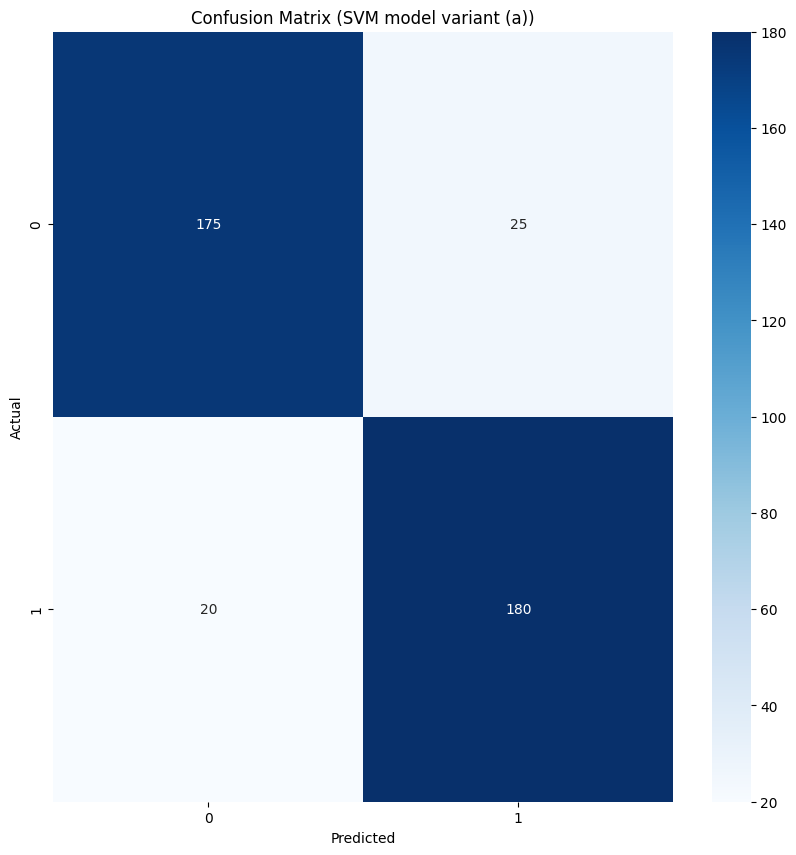

In [15]:
# Create a confusion matrix (for model variant (a))
cm_a = confusion_matrix(y_actual, y_predicted_a)
plt.figure(figsize=(10, 10))
plt.title("Confusion Matrix (SVM model variant (a))")
sns.heatmap(cm_a, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

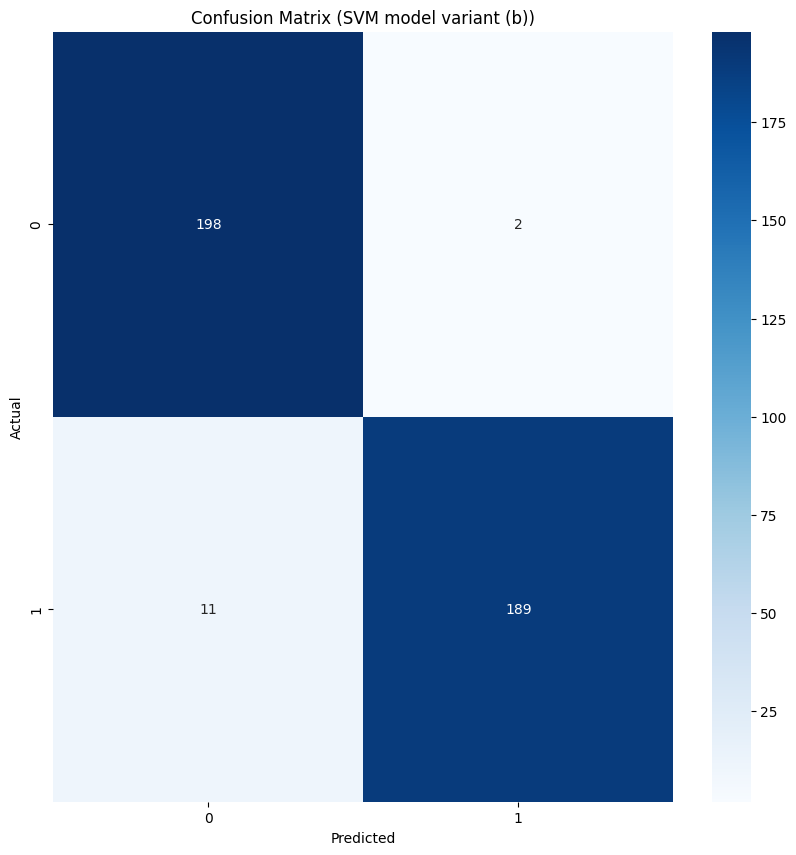

In [16]:
# Create a confusion matrix (for model variant (b))
cm_b = confusion_matrix(y_actual, y_predicted_b)
plt.figure(figsize=(10, 10))
plt.title("Confusion Matrix (SVM model variant (b))")
sns.heatmap(cm_b, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

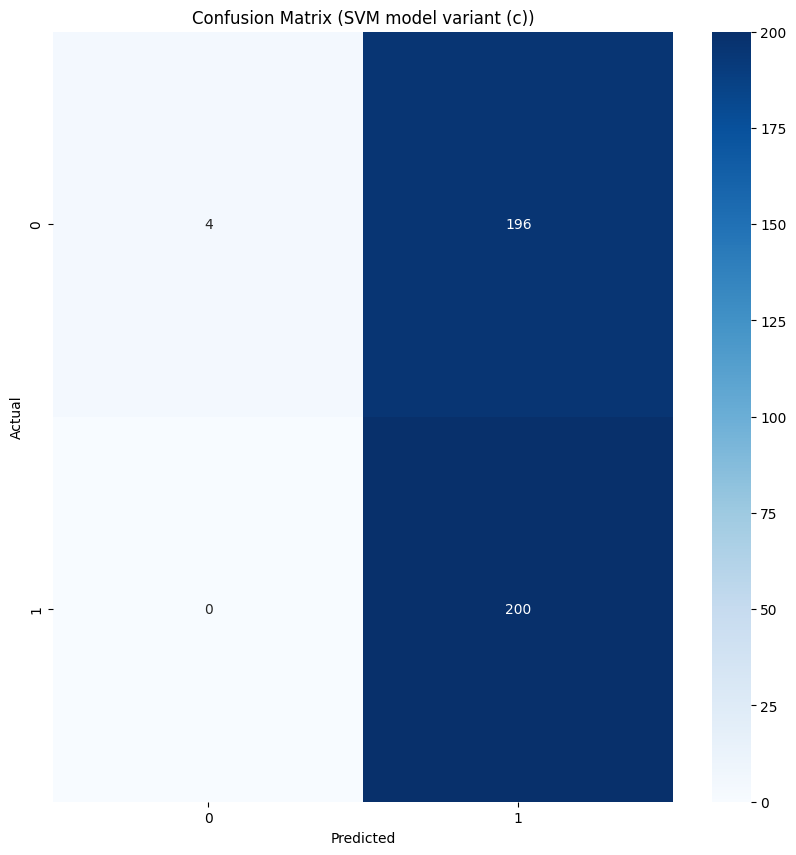

In [17]:
# Create a confusion matrix (for model variant (c))
cm_c = confusion_matrix(y_actual, y_predicted_c)
plt.figure(figsize=(10, 10))
plt.title("Confusion Matrix (SVM model variant (c))")
sns.heatmap(cm_c, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [18]:
# Accuracy, precision, recall, f1-score (for model variant (a))
accuracy_a = accuracy_score(y_actual, y_predicted_a)
precision_a = precision_score(y_actual, y_predicted_a)
recall_a = recall_score(y_actual, y_predicted_a)
f1_score_a = f1_score(y_actual, y_predicted_a)

print("------ SVM model variant (a) ------")
print(f"Accuraracy: {accuracy_a * 100:.2f}%")
print(f"Precision: {precision_a * 100:.2f}%")
print(f"Recall: {recall_a* 100:.2f}%")
print(f"F1-score: {f1_score_a * 100:.2f}%")

------ SVM model variant (a) ------
Accuraracy: 88.75%
Precision: 87.80%
Recall: 90.00%
F1-score: 88.89%


In [19]:
# Accuracy, precision, recall, f1-score (for model variant (b))
accuracy_b = accuracy_score(y_actual, y_predicted_b)
precision_b = precision_score(y_actual, y_predicted_b)
recall_b = recall_score(y_actual, y_predicted_b)
f1_score_b = f1_score(y_actual, y_predicted_b)

print("------ SVM model variant (b) ------")
print(f"Accuraracy: {accuracy_b * 100:.2f}%")
print(f"Precision: {precision_b * 100:.2f}%")
print(f"Recall: {recall_b* 100:.2f}%")
print(f"F1-score: {f1_score_b * 100:.2f}%")

------ SVM model variant (b) ------
Accuraracy: 96.75%
Precision: 98.95%
Recall: 94.50%
F1-score: 96.68%


In [20]:
# Accuracy, precision, recall, f1-score (for model variant (c))
accuracy_c = accuracy_score(y_actual, y_predicted_c)
precision_c = precision_score(y_actual, y_predicted_c)
recall_c = recall_score(y_actual, y_predicted_c)
f1_score_c = f1_score(y_actual, y_predicted_c)

print("------ SVM model variant (c) ------")
print(f"Accuraracy: {accuracy_c * 100:.2f}%")
print(f"Precision: {precision_c * 100:.2f}%")
print(f"Recall: {recall_c* 100:.2f}%")
print(f"F1-score: {f1_score_c * 100:.2f}%")

------ SVM model variant (c) ------
Accuraracy: 51.00%
Precision: 50.51%
Recall: 100.00%
F1-score: 67.11%


In [21]:
# Try it on an image
img = cv.imread("../CF_processed/train/normal/train_norm_22.png")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.resize(img, (500, 500))
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Model(a) prediction: Normal
Model(b) prediction: Normal
Model(c) prediction: Normal
Actual: Normal


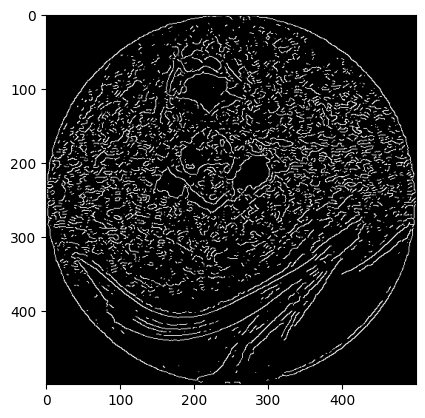

In [22]:
# Predict the image using the SVM model variant (a)
img_pred = svm_model_a.predict(img.flatten().reshape(1, -1))
print(f"Model(a) prediction: {'Normal' if img_pred == 0 else 'Fractured'}")

# Predict the image using the SVM model variant (b)
img_pred = svm_model_b.predict(img.flatten().reshape(1, -1))
print(f"Model(b) prediction: {'Normal' if img_pred == 0 else 'Fractured'}")

# Predict the image using the SVM model variant (c)
img_pred = svm_model_c.predict(img.flatten().reshape(1, -1))
print(f"Model(c) prediction: {'Normal' if img_pred == 0 else 'Fractured'}")


print("Actual: Normal")
plt.imshow(img, cmap='gray')